In [1]:
import Augmentor
import numpy as np
import torch
from torchvision import transforms

# 假设 rgbd_tensor 和 mask_tensor 是已经整理成 PyTorch Tensor 的数据
rgbd_tensor:torch.Tensor = torch.load('./dataset/test/rgbd-test.pt')[:10]
mask_tensor:torch.Tensor = torch.load('./dataset/test/mask-test.pt')[:10]

from data.utils import split_rgbd_tensor
rgb_tensor, depth_tensor = split_rgbd_tensor(rgbd_tensor)

print(rgb_tensor.shape)


torch.Size([10, 3, 224, 224])


In [7]:

# 使用 Augmentor 对 NumPy 数组进行增强
p = Augmentor.Pipeline()
# 添加你需要的增强操作
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.flip_left_right(probability=0.5)

for i in range(rgbd_tensor.shape[0]):
    rgb = (rgb_tensor[i].permute(1,2,0).numpy() * 255).astype(np.uint8)
    depth = (depth_tensor[i].permute(1,2,0).numpy() * 255).astype(np.uint8)

    aug_rgb = p.sample_with_array(rgb)
    aug_depth = p.sample_with_array(depth)


# # 将 PyTorch Tensor 转换为 NumPy 数组
# rgbd_array = rgbd_tensor.numpy()
# mask_array = mask_tensor.numpy()



# # 在这里应用增强操作
# augmented_rgbd_array = p.sample_with_array(rgbd_array)
# augmented_mask_array = p.sample_with_array(mask_array)

# # 3. 将增强后的 NumPy 数组转换回 PyTorch Tensor
# augmented_rgbd_tensor = torch.from_numpy(augmented_rgbd_array)
# augmented_mask_tensor = torch.from_numpy(augmented_mask_array)

# # 最后，你可以将增强后的数据传递给模型进行训练

IndexError: list index out of range

In [12]:
import math
import torch
from torch import Tensor
import matplotlib.pyplot as plt
import numpy as np

def show_rgbd_imgs(rgbd_tensor: torch.Tensor, num_rows=5, num_cols=5):
    """
    随机展示一批RGBD图像。

    参数：
    - rgbd_tensor: 输入的RGBD张量，维度为 [数量, 4, 高度, 宽度]，包含RGB和深度信息
    - num_rows: 展示的行数
    - num_cols: 展示的列数
    """
    num_images = num_rows * num_cols
    # indices = np.random.choice(len(rgbd_tensor), num_images, replace=False)

    fig, axes = plt.subplots(num_rows, 2 * num_cols, figsize=(20, 12))

    for i, ax in enumerate(axes.flat):
        index = math.floor(i / 2)

        rgbd_image = rgbd_tensor[index+50].numpy()

        # 提取RGB和深度图像
        rgb_image = rgbd_image[:3, :, :]
        depth_image = rgbd_image[3, :, :]

        if i % 2 == 0:
            # RGB图像展示
            ax.imshow(np.transpose(rgb_image, (1, 2, 0)))
            ax.axis('off')
            ax.set_title(f'RGB {index}')
        else:
            # 深度图像展示
            ax.imshow(depth_image, cmap='gray', vmin=depth_image.min(), vmax=depth_image.max())
            ax.axis('off')
            ax.set_title(f'Depth {index}')

    plt.show()

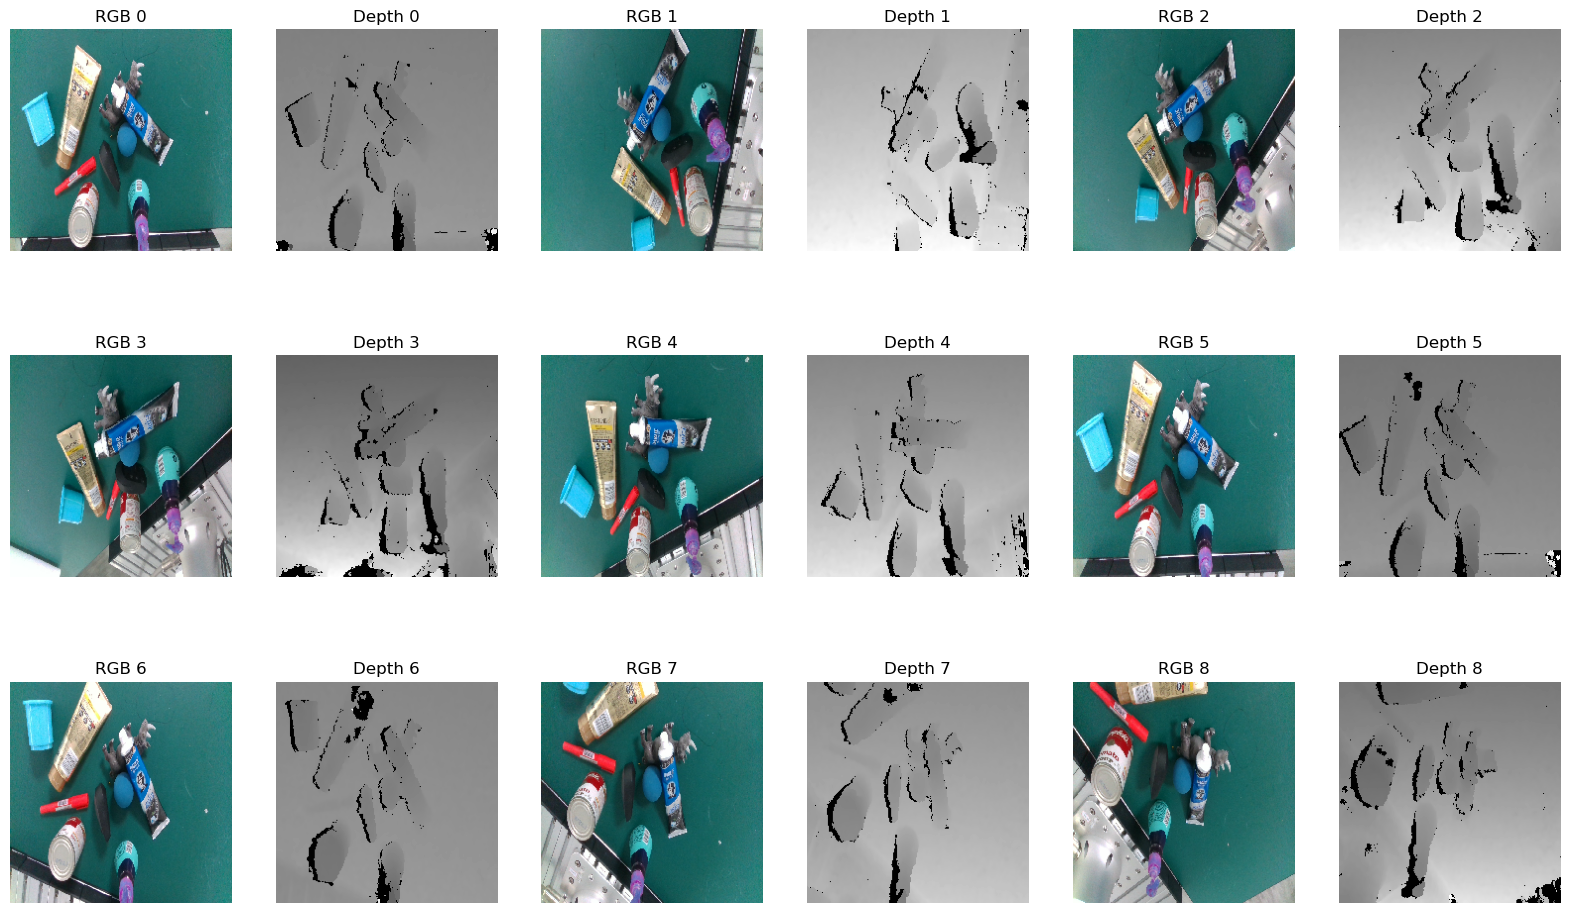

In [13]:
rgbd = torch.load('./dataset/train/rgbd-full.pt')
show_rgbd_imgs(rgbd, num_rows=3, num_cols=3)